In [33]:
from datetime import datetime
from meteostat import Point
import sys
import json
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [34]:
sys.path.insert(1, '../Functions')

In [35]:
import FetchData
import CleanData
import ModelData

In [36]:
location = 'Maryland'
f = open('../Config/locations.json')
data = json.load(f)
point = Point(data[location]['Latitude'], data[location]['Longitude'], data[location]['Altitude'])

In [37]:
dataframe_0 = FetchData.fetch_weather(start = datetime(2021, 1, 1), end = datetime(2022, 12, 11), location = "Maryland")
dataframe_0.to_csv('../Data/Raw/weather_data_raw.csv')

In [38]:
dataframe_1 = FetchData.fetch_hospitalization_record(epi_start = 20210101, epi_end = 20221213, state = 'MD')
dataframe_1.to_csv('../Data/Raw/hospitalization_data_raw.csv')

In [39]:
dataframe_2 = FetchData.fetch_vaccination_record()
dataframe_2.to_csv('../Data/Raw/vaccination_data_raw.csv')

In [59]:
vaccination_data = CleanData.vaccination_cleanup(dataframe_2)
vaccination_data.to_csv('../Data/Raw/vaccination_data_refined.csv')

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [41]:
final_dataset = CleanData.data_merge(dataframe_0, dataframe_1, vaccination_data)
final_dataset.to_csv('../Data/Refined/final_dataset_refined.csv')

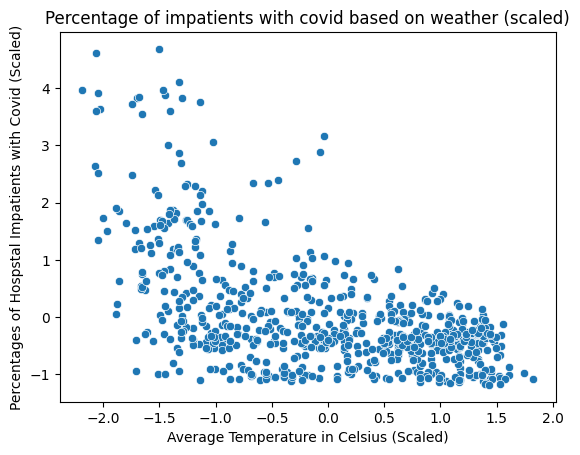

In [42]:
Temperature_X_Covid_plot = ModelData.plot_temperature_covid(final_dataset)
Temperature_X_Covid_Regression = ModelData.regression_temperature_covid(final_dataset)
plt.savefig("../Data/Graphs/Temperature_X_Covid.PNG")

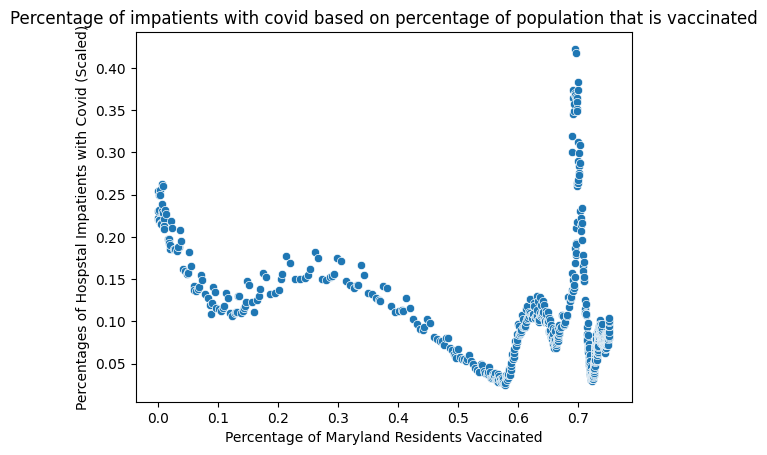

In [43]:
Vaccination_X_Covid_plot = ModelData.plot_covid_vaccination(final_dataset)
Vaccination_X_Covid_Regression = ModelData.regression_covid_vaccination(final_dataset)
plt.savefig("../Data/Graphs/Vaccination_X_Covid.PNG")

In [61]:
Regression = [['Average Temperature and Covid', Temperature_X_Covid_Regression], ['Vaccination Rate and Covid', Vaccination_X_Covid_Regression]]
Regression_Values = pd.DataFrame(Regression, columns = ['Variable', 'Regression Value'])
Regression_Values.to_csv('../Data/Refined/Regression_Values.csv', index = False)

In [44]:
train_year = "2021"
test_year = "2022"
X1 = "tavg"
X2 = "Percentage MD Population Vaccinated"
Y = "percent_of_inpatients_with_covid"

In [45]:
Train_data = ModelData.train_data(final_dataset, train_year)
Test_data = ModelData.test_data(final_dataset, test_year)

    date_year  tavg  percent_of_inpatients_with_covid  \
0        2021   0.4                          0.220622   
1        2021   5.5                          0.222718   
2        2021   2.2                          0.230675   
3        2021   2.6                          0.254724   
4        2021   2.4                          0.250000   
..        ...   ...                               ...   
360      2021   2.0                          0.259958   
361      2021   6.6                          0.263677   
362      2021   7.7                          0.264354   
363      2021   8.5                          0.267148   
364      2021   9.9                          0.290276   

     Percentage MD Population Vaccinated  
0                               0.000256  
1                               0.000265  
2                               0.000284  
3                               0.000358  
4                               0.000496  
..                                   ...  
360           

In [46]:
Train_data_X = ModelData.train_data_X(Train_data,X1,X2)
Train_data_Y = ModelData.train_data_Y(Train_data,Y)
Test_data_X = ModelData.test_data_X(Test_data,X1,X2)
Test_data_Y = ModelData.test_data_Y(Test_data,Y)

In [47]:
Predictions = ModelData.prediction(Train_data_X, Train_data_Y, Test_data_X)

In [58]:
MSE = mean_squared_error(Test_data_Y, Predictions)
MAE = mean_absolute_error(Test_data_Y, Predictions)
Measurement = [['Mean Squared Error', MSE], ['Mean Absolute Error', MAE]]
MSE_MAE = pd.DataFrame(Measurement, columns = ['Measure', 'Value'])
MSE_MAE.to_csv('../Data/Refined/MSE_MAE.csv', index = False)